## 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 6th of December of 2017, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br>
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p><em><sup>2</sup> <strong>Update on March 2020</strong>: Well, it turned out to be volatile indeed :D</em></p>
<p>That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dec6 = pd.read_csv("/coinmarketcap_06122017.csv")


market_cap_raw = Dec6[['id','market_cap_usd']]
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


## 2. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [ ]:
# cap = market_cap_raw.query('market_cap_usd>0')

cap = market_cap_raw[market_cap_raw['market_cap_usd'] > 0]

print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


## 3. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

In [ ]:
print(cap.head())
cap10 = cap.head(10).set_index('id')
print(cap10)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10
4        ripple    9.365343e+09
              market_cap_usd
id                          
bitcoin         2.130493e+11
ethereum        4.352945e+10
bitcoin-cash    2.529585e+10
iota            1.475225e+10
ripple          9.365343e+09
dash            5.794076e+09
litecoin        5.634498e+09
bitcoin-gold    4.920065e+09
monero          4.331688e+09
cardano         3.231420e+09


              market_cap_usd  market_cap_perc
id                                           
bitcoin         2.130493e+11        56.918669
ethereum        4.352945e+10        11.629410
bitcoin-cash    2.529585e+10         6.758088
iota            1.475225e+10         3.941238
ripple          9.365343e+09         2.502063
dash            5.794076e+09         1.547956
litecoin        5.634498e+09         1.505323
bitcoin-gold    4.920065e+09         1.314454
monero          4.331688e+09         1.157262
cardano         3.231420e+09         0.863312


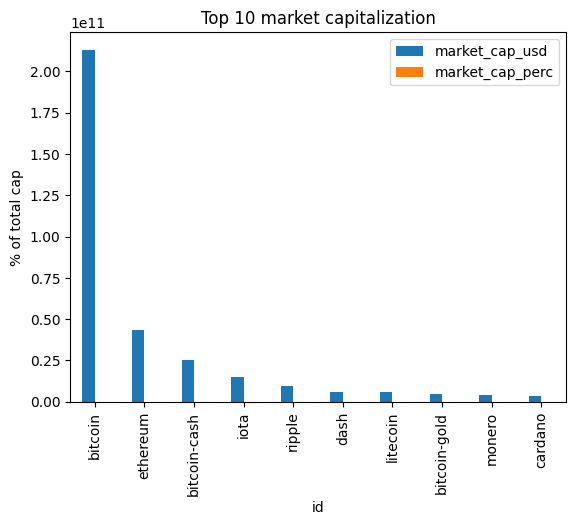

In [ ]:
cap10['market_cap_perc'] = cap10['market_cap_usd']/cap['market_cap_usd'].sum()*100

print(cap10)
cap10.plot.bar()
plt.title('Top 10 market capitalization')
plt.ylabel('% of total cap')
plt.show()

## 4. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

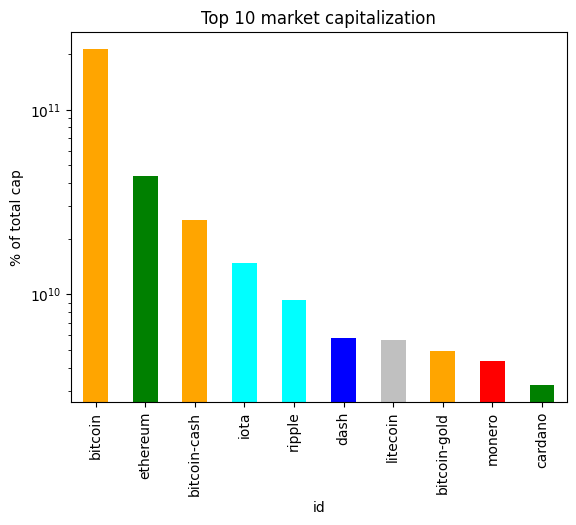

In [ ]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
cap10.market_cap_usd.plot.bar(logy=True, color=COLORS)
plt.title('Top 10 market capitalization')
plt.ylabel('% of total cap')
plt.show()

## 5. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [ ]:
volatility = Dec6[['id','percent_change_7d','percent_change_24h']]

volatility = volatility.set_index('id').dropna()
print(volatility.head())

volatility = volatility.sort_values(by='percent_change_24h')
print(volatility)

              percent_change_7d  percent_change_24h
id                                                 
bitcoin                   17.45                7.33
ethereum                  -7.33               -3.93
bitcoin-cash              -4.75               -5.51
iota                     255.82               83.35
ripple                   -14.79               -3.70
               percent_change_7d  percent_change_24h
id                                                  
flappycoin                -96.61              -95.85
credence-coin             -95.31              -94.22
coupecoin                 -61.24              -93.93
tyrocoin                  -87.43              -79.02
petrodollar               542.96              -76.55
...                          ...                 ...
eaglecoin                 114.73              272.50
beatcoin                  132.79              295.49
bitzeny                  3360.71              416.04
cashcoin                  374.30              457.86


## 6. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

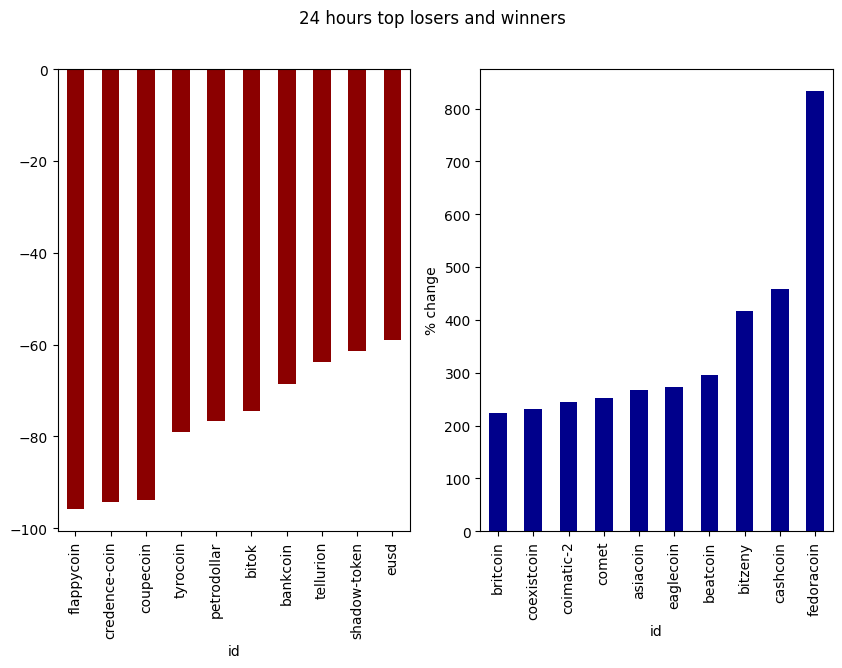

In [ ]:
#Defining a function with 2 parameters, the series to plot and the title

def top10_subplot(volatility_series, title):

    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers
    ax =volatility_series[:10].plot.bar(color='darkred', ax=axes[0])
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    plt.ylabel("% change")
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"
# Calling the function above with the 24 hours period series and title DTITLE
fig, ax = top10_subplot(volatility['percent_change_24h'],DTITLE)







## 7. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

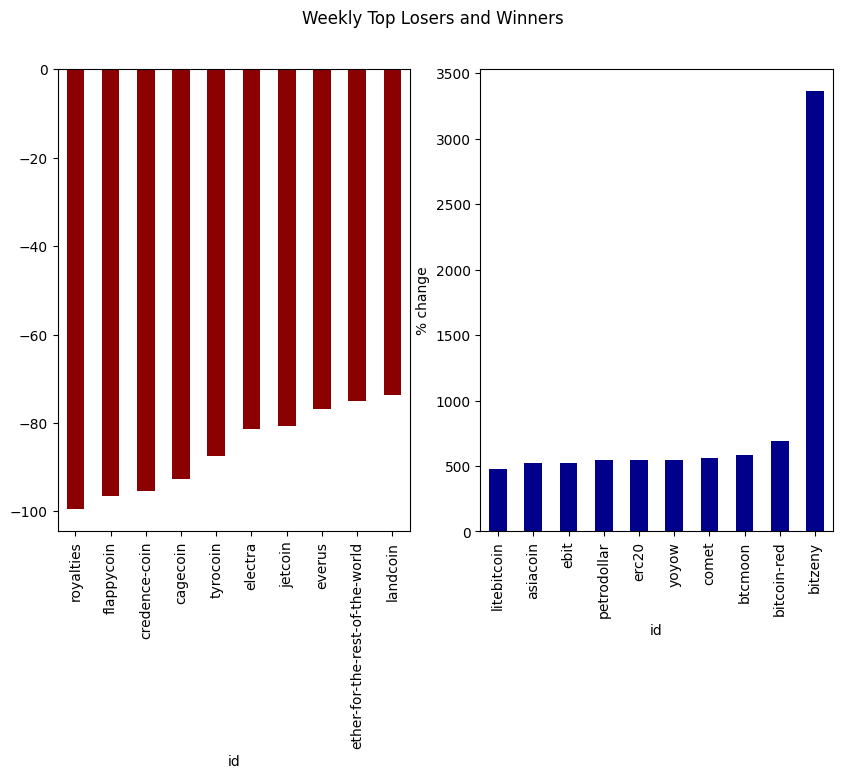

In [ ]:
volatility7d = volatility.sort_values(by='percent_change_7d')
wtitle = 'Weekly Top Losers and Winners'
fig, ax = top10_subplot(volatility7d['percent_change_7d'],wtitle)


## 8. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [ ]:
largecap = cap[cap['market_cap_usd']>10000000000]
print(largecap)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


## 9. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

<BarContainer object of 3 artists>

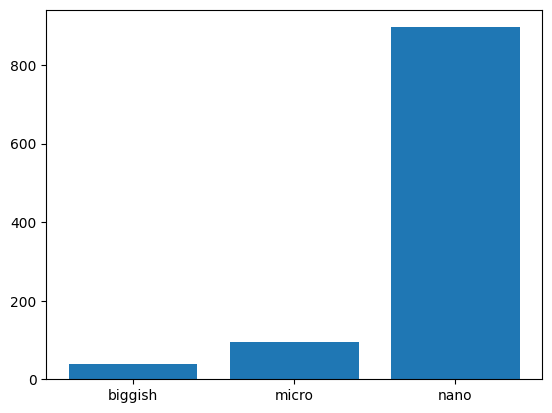

In [ ]:
def capcount(query_string):

    return cap.query(query_string).count().id

LABELS = ["biggish", "micro", "nano"]
biggish = capcount('market_cap_usd>300000000')
micro = capcount('market_cap_usd >= 50000000 & market_cap_usd < 300000000')
nano =  capcount('market_cap_usd < 50000000')

values = [biggish, micro, nano]
plt.bar(range(len(values)), values, tick_label=LABELS)